In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
from tqdm import tqdm

# For reading CSV with progress bar
with tqdm(desc="Loading CSV", unit=" rows") as pbar:
    df = pd.read_csv('ab_nyc_2019.csv')
    pbar.update(len(df))

df.head()

Loading CSV: 48895 rows [00:00, 270352.51 rows/s]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Wrangling

In [3]:
# Check for the shape of the DataFrame
print("This dataframe has {} samples and {} features.".format(df.shape[0], df.shape[1]))

This dataframe has 48895 samples and 16 features.


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


In [5]:
# As good practice, we can drop the 'id' column as it is not useful for analysis
df.drop(columns=['id'], inplace=True)

# We will also drop columns with more than 50% missing values
threshold = 0.5 * df.shape[0]
df.dropna(thresh=threshold, axis=1, inplace=True)
# Check the shape of the DataFrame after dropping columns
print("Shape after dropping columns with more than 50% missing values: {}".format(df.shape))

Shape after dropping columns with more than 50% missing values: (48895, 15)


In [6]:
# Back to missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in each column after dropping columns with more than 50% missing values:")
print(missing_values)

Missing values in each column after dropping columns with more than 50% missing values:
name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


In [7]:
# For the name column, we can fill missing values with 'Unknown'
df['name'].fillna('Unknown', inplace=True)

# For the host_name column, we can fill missing values with 'Unknown'
df['host_name'].fillna('Unknown', inplace=True)

# For the last_review column, we can fill missing values with 'No Review'
df['last_review'].fillna('No Review', inplace=True)

# For the reviews_per_month column, we can fill missing values with 0
df['reviews_per_month'].fillna(0, inplace=True)

In [8]:
# Now we can check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: {}".format(duplicate_rows))

Number of duplicate rows: 0


In [9]:
# Check for unique values in categorical columns ie columns with object data type
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].nunique()
    print("Column '{}': {} unique values".format(column, unique_values))

# Check for unique values in numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
for column in numerical_columns:
    unique_values = df[column].nunique()
    print("Column '{}': {} unique values".format(column, unique_values))    

Column 'name': 47906 unique values
Column 'host_name': 11453 unique values
Column 'neighbourhood_group': 5 unique values
Column 'neighbourhood': 221 unique values
Column 'room_type': 3 unique values
Column 'last_review': 1765 unique values
Column 'host_id': 37457 unique values
Column 'latitude': 19048 unique values
Column 'longitude': 14718 unique values
Column 'price': 674 unique values
Column 'minimum_nights': 109 unique values
Column 'number_of_reviews': 394 unique values
Column 'reviews_per_month': 938 unique values
Column 'calculated_host_listings_count': 47 unique values
Column 'availability_365': 366 unique values


In [10]:
# Analyze unique values in context
print("=== UNIQUE VALUES ANALYSIS ===\n")

# Calculate percentage of unique values for each column
total_rows = len(df)
print(f"Total rows: {total_rows}\n")

categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

print("CATEGORICAL COLUMNS:")
for column in categorical_columns:
    unique_count = df[column].nunique()
    unique_percentage = (unique_count / total_rows) * 100
    print(f"  {column}: {unique_count} unique ({unique_percentage:.1f}%)")
    
    # Recommendations based on cardinality
    if unique_percentage > 90:
        print(f"    → HIGH CARDINALITY: Consider dropping or feature engineering")
    elif unique_percentage > 50:
        print(f"    → MEDIUM CARDINALITY: Consider grouping or encoding")
    else:
        print(f"    → LOW CARDINALITY: Keep as is")
    print()

print("NUMERICAL COLUMNS:")
for column in numerical_columns:
    unique_count = df[column].nunique()
    unique_percentage = (unique_count / total_rows) * 100
    print(f"  {column}: {unique_count} unique ({unique_percentage:.1f}%)")
    
    # Check if it's really categorical (few unique values)
    if unique_count < 20:
        print(f"    → LOOKS CATEGORICAL: Consider converting to category")
    else:
        print(f"    → CONTINUOUS: Keep as numeric")
    print()

=== UNIQUE VALUES ANALYSIS ===

Total rows: 48895

CATEGORICAL COLUMNS:
  name: 47906 unique (98.0%)
    → HIGH CARDINALITY: Consider dropping or feature engineering

  host_name: 11453 unique (23.4%)
    → LOW CARDINALITY: Keep as is

  neighbourhood_group: 5 unique (0.0%)
    → LOW CARDINALITY: Keep as is

  neighbourhood: 221 unique (0.5%)
    → LOW CARDINALITY: Keep as is

  room_type: 3 unique (0.0%)
    → LOW CARDINALITY: Keep as is

  last_review: 1765 unique (3.6%)
    → LOW CARDINALITY: Keep as is

NUMERICAL COLUMNS:
  host_id: 37457 unique (76.6%)
    → CONTINUOUS: Keep as numeric

  latitude: 19048 unique (39.0%)
    → CONTINUOUS: Keep as numeric

  longitude: 14718 unique (30.1%)
    → CONTINUOUS: Keep as numeric

  price: 674 unique (1.4%)
    → CONTINUOUS: Keep as numeric

  minimum_nights: 109 unique (0.2%)
    → CONTINUOUS: Keep as numeric

  number_of_reviews: 394 unique (0.8%)
    → CONTINUOUS: Keep as numeric

  reviews_per_month: 938 unique (1.9%)
    → CONTINUOUS: 

In [11]:
# Data preprocessing based on unique value analysis
print("=== APPLYING PREPROCESSING ===\n")

# 1. Drop high cardinality ID-like columns
columns_to_drop = ['name', 'host_id']  # Nearly unique identifiers
print(f"Dropping high cardinality columns: {columns_to_drop}")
df = df.drop(columns=columns_to_drop)

# 2. Convert last_review to datetime and extract useful features
print("Converting last_review to datetime features...")
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['review_year'] = df['last_review'].dt.year
df['review_month'] = df['last_review'].dt.month
df['days_since_last_review'] = (pd.Timestamp.now() - df['last_review']).dt.days

# Drop original last_review column
df = df.drop(columns=['last_review'])

# 3. Create price categories for better analysis
print("Creating price categories...")
df['price_category'] = pd.cut(df['price'], 
                             bins=[0, 50, 100, 200, 500, float('inf')],
                             labels=['Budget', 'Mid-range', 'Premium', 'Luxury', 'Ultra-luxury'])

# 4. Group low-frequency neighbourhoods
print("Grouping rare neighbourhoods...")
neighbourhood_counts = df['neighbourhood'].value_counts()
rare_neighbourhoods = neighbourhood_counts[neighbourhood_counts < 10].index
df['neighbourhood_grouped'] = df['neighbourhood'].replace(rare_neighbourhoods, 'Other')

# 5. Convert appropriate numerical columns to categories
print("Converting low-cardinality numerics to categories...")
df['minimum_nights_category'] = pd.cut(df['minimum_nights'], 
                                      bins=[0, 1, 7, 30, float('inf')],
                                      labels=['Same_day', 'Short_term', 'Weekly', 'Monthly+'])

print(f"\nFinal shape: {df.shape}")
print(f"New columns created: price_category, neighbourhood_grouped, minimum_nights_category, review_year, review_month, days_since_last_review")

=== APPLYING PREPROCESSING ===

Dropping high cardinality columns: ['name', 'host_id']
Converting last_review to datetime features...
Creating price categories...
Grouping rare neighbourhoods...
Converting low-cardinality numerics to categories...

Final shape: (48895, 18)
New columns created: price_category, neighbourhood_grouped, minimum_nights_category, review_year, review_month, days_since_last_review


In [12]:
# Check final data state
print("=== FINAL DATA OVERVIEW ===\n")

print("Remaining columns:")
for col in df.columns:
    print(f"  - {col}: {df[col].dtype}")

print(f"\nData types summary:")
print(df.dtypes.value_counts())

print(f"\nFinal shape: {df.shape}")
df.head()

=== FINAL DATA OVERVIEW ===

Remaining columns:
  - host_name: object
  - neighbourhood_group: object
  - neighbourhood: object
  - latitude: float64
  - longitude: float64
  - room_type: object
  - price: int64
  - minimum_nights: int64
  - number_of_reviews: int64
  - reviews_per_month: float64
  - calculated_host_listings_count: int64
  - availability_365: int64
  - review_year: float64
  - review_month: float64
  - days_since_last_review: float64
  - price_category: category
  - neighbourhood_grouped: object
  - minimum_nights_category: category

Data types summary:
float64     6
object      5
int64       5
category    1
category    1
Name: count, dtype: int64

Final shape: (48895, 18)


,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_year,review_month,days_since_last_review,price_category,neighbourhood_grouped,minimum_nights_category
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018.0,10.0,2449.0,Premium,Kensington,Same_day
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019.0,5.0,2235.0,Luxury,Midtown,Same_day
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,NaN,NaN,NaN,Premium,Harlem,Short_term
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019.0,7.0,2190.0,Mid-range,Clinton Hill,Same_day
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018.0,11.0,2418.0,Mid-range,East Harlem,Weekly


In [13]:
# Alternative approach: Create categorical features for better interpretation
print("=== CREATING CATEGORICAL DATE FEATURES ===\n")

# Create review status categories
df['review_status'] = 'Never_Reviewed'
df.loc[df['review_year'].notna(), 'review_status'] = 'Has_Reviews'

# Create review recency categories
df['review_recency'] = 'Never_Reviewed'
df.loc[df['days_since_last_review'].notna() & (df['days_since_last_review'] <= 30), 'review_recency'] = 'Recent'
df.loc[df['days_since_last_review'].notna() & (df['days_since_last_review'] <= 365), 'review_recency'] = 'This_Year'
df.loc[df['days_since_last_review'].notna() & (df['days_since_last_review'] > 365), 'review_recency'] = 'Old'

# Fill NaN values
df['review_year'].fillna(0, inplace=True)
df['review_month'].fillna(0, inplace=True)
df['days_since_last_review'].fillna(9999, inplace=True)
df['has_reviews'] = (df['review_year'] != 0).astype(int)

print("Review status distribution:")
print(df['review_status'].value_counts())
print("\nReview recency distribution:")
print(df['review_recency'].value_counts())

=== CREATING CATEGORICAL DATE FEATURES ===

Review status distribution:
review_status
Has_Reviews       38843
Never_Reviewed    10052
Name: count, dtype: int64

Review recency distribution:
review_recency
Old               38843
Never_Reviewed    10052
Name: count, dtype: int64


In [14]:
pd.set_option('display.max_columns', None)  # Show all columns in output
df.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_year,review_month,days_since_last_review,price_category,neighbourhood_grouped,minimum_nights_category,review_status,review_recency,has_reviews
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018.0,10.0,2449.0,Premium,Kensington,Same_day,Has_Reviews,Old,1
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019.0,5.0,2235.0,Luxury,Midtown,Same_day,Has_Reviews,Old,1
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,0.0,0.0,9999.0,Premium,Harlem,Short_term,Never_Reviewed,Never_Reviewed,0
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019.0,7.0,2190.0,Mid-range,Clinton Hill,Same_day,Has_Reviews,Old,1
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018.0,11.0,2418.0,Mid-range,East Harlem,Weekly,Has_Reviews,Old,1


In [15]:
# Convert date columns to appropriate integer types
print("=== FIXING DATA TYPES FOR DATE COLUMNS ===\n")

# Convert review_year and review_month to integers
df['review_year'] = df['review_year'].astype(int)
df['review_month'] = df['review_month'].astype(int)

# convert days_since_last_review to integer (no need for decimals in days)
df['days_since_last_review'] = df['days_since_last_review'].astype(int)

print("Data types after conversion:")
print(f"review_year: {df['review_year'].dtype}")
print(f"review_month: {df['review_month'].dtype}")
print(f"days_since_last_review: {df['days_since_last_review'].dtype}")

print(f"\nSample values:")
print(f"review_year unique values (first 10): {sorted(df['review_year'].unique())[:10]}")
print(f"review_month unique values: {sorted(df['review_month'].unique())}")

pd.set_option('display.max_columns', None)
df.head()

=== FIXING DATA TYPES FOR DATE COLUMNS ===

Data types after conversion:
review_year: int64
review_month: int64
days_since_last_review: int64

Sample values:
review_year unique values (first 10): [np.int64(0), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019)]
review_month unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]


,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_year,review_month,days_since_last_review,price_category,neighbourhood_grouped,minimum_nights_category,review_status,review_recency,has_reviews
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10,2449,Premium,Kensington,Same_day,Has_Reviews,Old,1
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,5,2235,Luxury,Midtown,Same_day,Has_Reviews,Old,1
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,0,0,9999,Premium,Harlem,Short_term,Never_Reviewed,Never_Reviewed,0
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,7,2190,Mid-range,Clinton Hill,Same_day,Has_Reviews,Old,1
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11,2418,Mid-range,East Harlem,Weekly,Has_Reviews,Old,1


## Exploratory Data Analysis

=== HOST WITH MOST LISTINGS ===

Top host: Michael with 417 listings


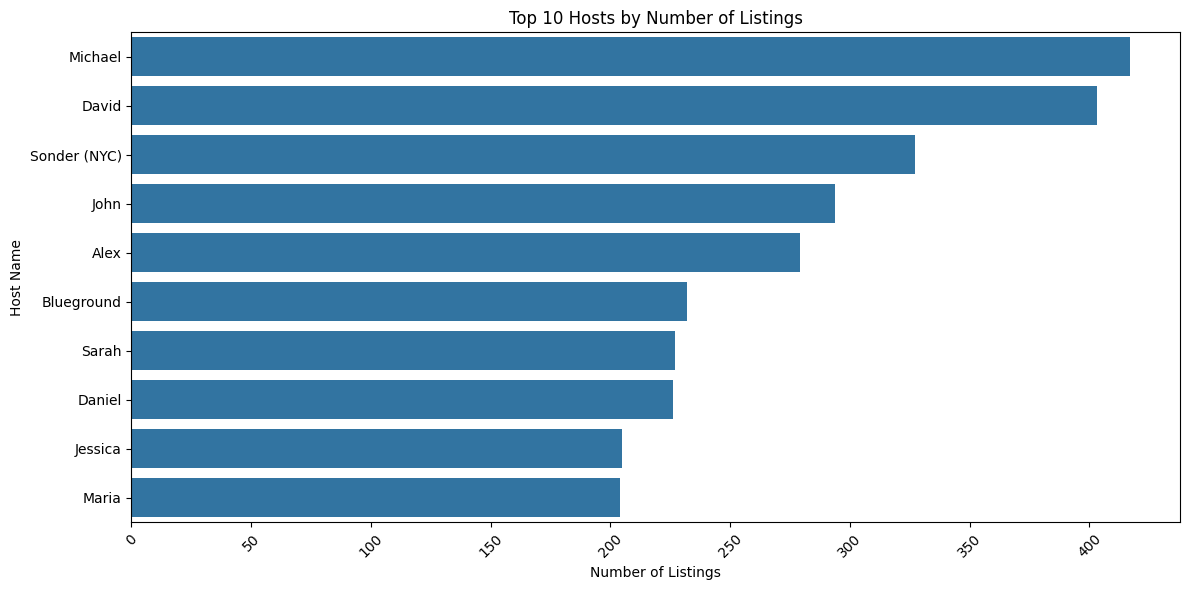

In [16]:
# Which host has the most listings?
print("=== HOST WITH MOST LISTINGS ===\n")
top_host = df['host_name'].value_counts().idxmax()
top_host_count = df['host_name'].value_counts().max()
print(f"Top host: {top_host} with {top_host_count} listings")

# Visualize the distribution of listings by host
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='host_name', order=df['host_name'].value_counts().index[:10])
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== NEIGHBOURHOOD WITH MOST LISTINGS ===

Top neighbourhood: Williamsburg with 3920 listings


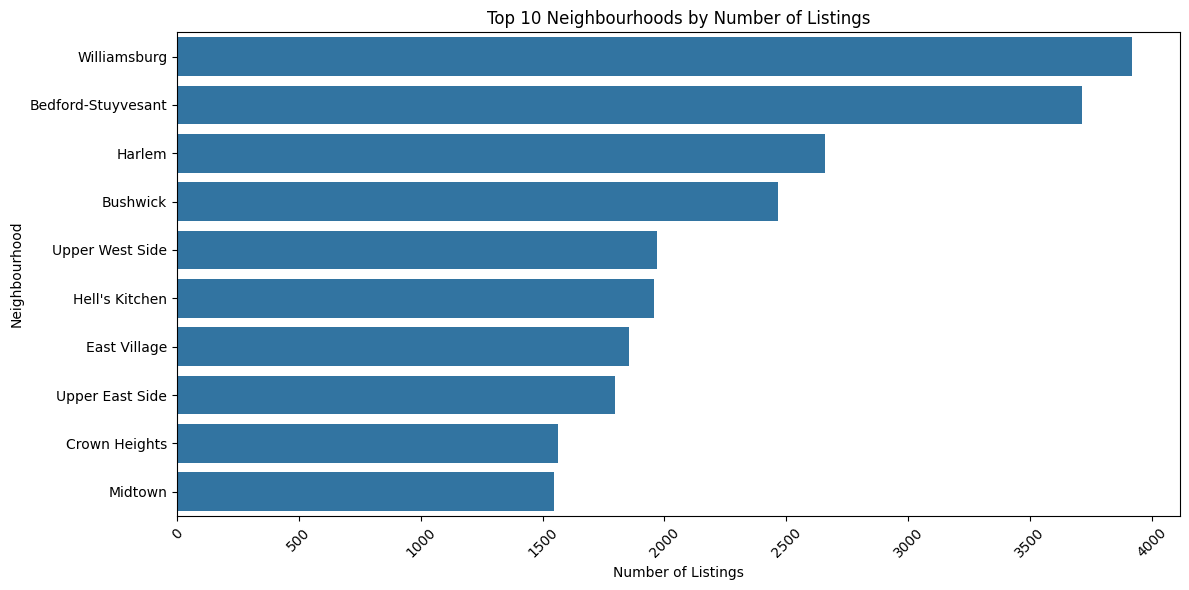

In [17]:
# Which neighbourhood has the most listings?
print("=== NEIGHBOURHOOD WITH MOST LISTINGS ===\n")
top_neighbourhood = df['neighbourhood_grouped'].value_counts().idxmax()
top_neighbourhood_count = df['neighbourhood_grouped'].value_counts().max()
print(f"Top neighbourhood: {top_neighbourhood} with {top_neighbourhood_count} listings")

# Visualize the distribution of listings by neighbourhood
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='neighbourhood_grouped', order=df['neighbourhood_grouped'].value_counts().index[:10])
plt.title('Top 10 Neighbourhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== MOST COMMON ROOM TYPE ===

Most common room type: Entire home/apt with 25409 listings


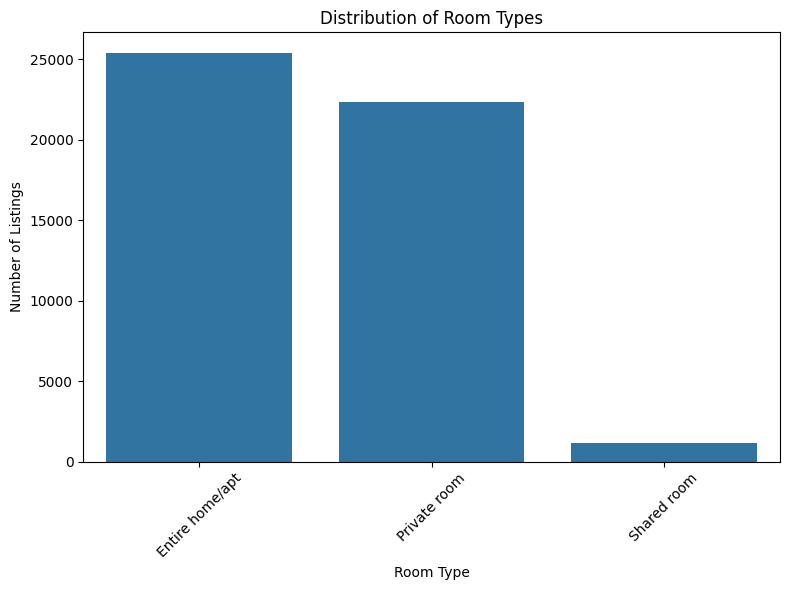

In [18]:
# Which room type is most common?
print("=== MOST COMMON ROOM TYPE ===\n")
top_room_type = df['room_type'].value_counts().idxmax()
top_room_type_count = df['room_type'].value_counts().max()
print(f"Most common room type: {top_room_type} with {top_room_type_count} listings")
# Visualize the distribution of room types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== PRICE DISTRIBUTION ===



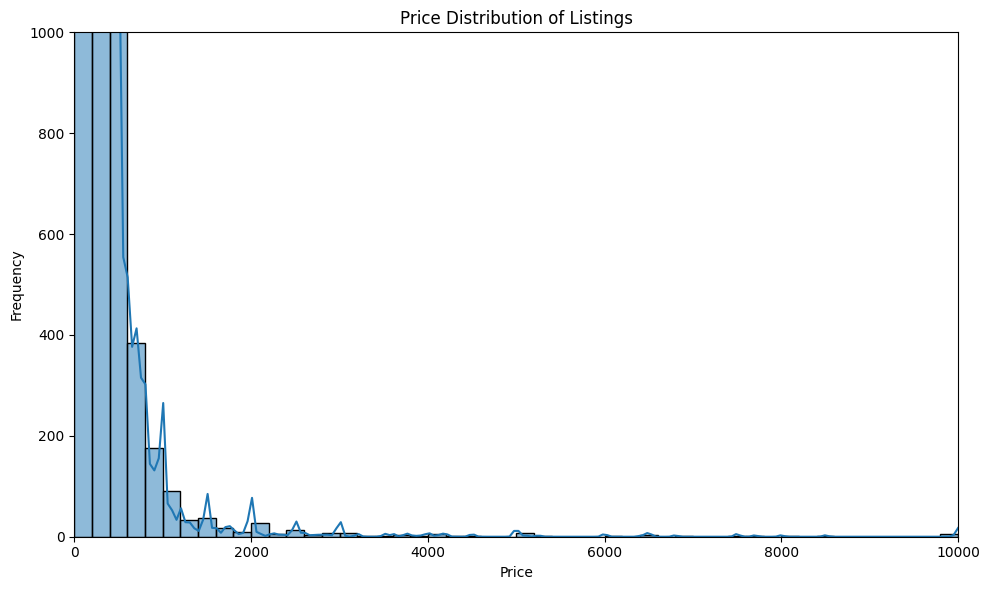

In [19]:
# Price distribution
print("=== PRICE DISTRIBUTION ===\n")
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution of Listings')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, df['price'].max())  # Limit x-axis to max price
plt.ylim(0, 1000)  # Limit y-axis to a reasonable value for better visibility
plt.tight_layout()
plt.show()

=== NUMBER OF LISTINGS BY PRICE CATEGORY ===



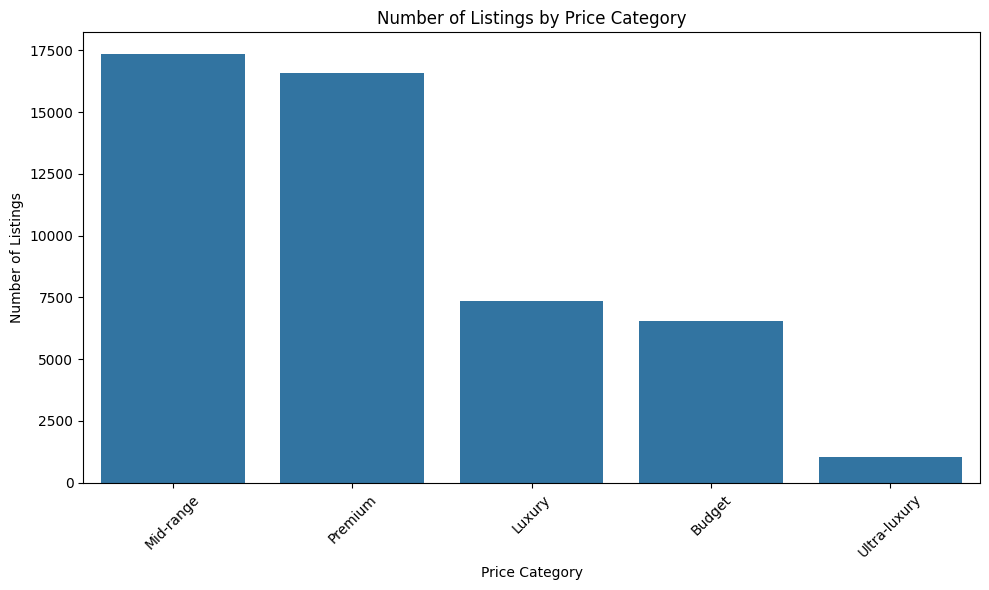

In [20]:
# number of listings by price category
print("=== NUMBER OF LISTINGS BY PRICE CATEGORY ===\n")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_category', order=df['price_category'].value_counts().index)
plt.title('Number of Listings by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== MINIMUM NIGHTS DISTRIBUTION ===



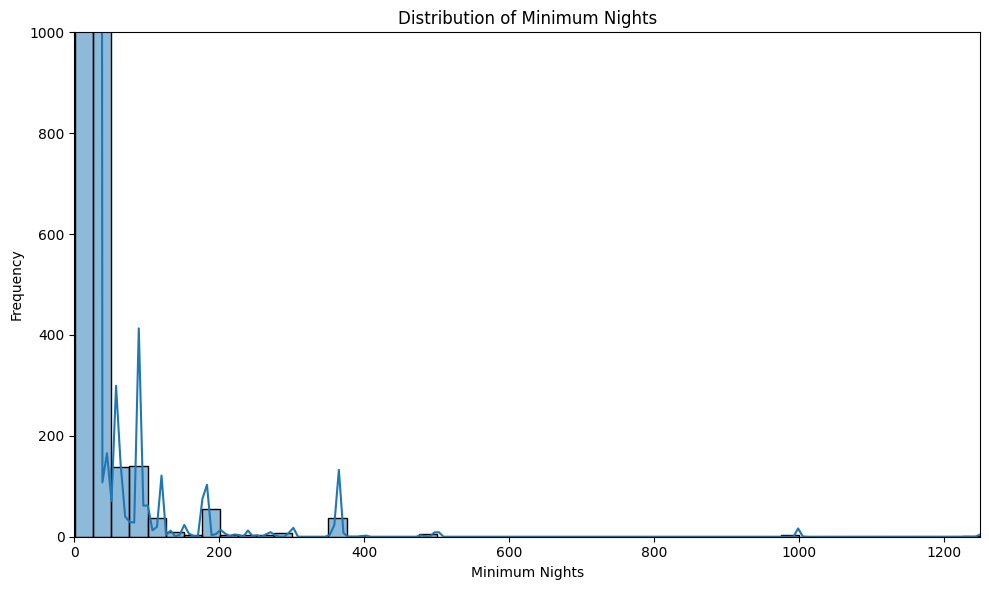

In [21]:
# Distribution of minimum nights
print("=== MINIMUM NIGHTS DISTRIBUTION ===\n")
plt.figure(figsize=(10, 6))
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.xlim(0, df['minimum_nights'].max())  # Limit x-axis to max minimum nights
plt.ylim(0, 1000)  # Limit y-axis to a reasonable value for better visibility
plt.tight_layout()
plt.show()

=== MINIMUM NIGHTS BY CATEGORY ===



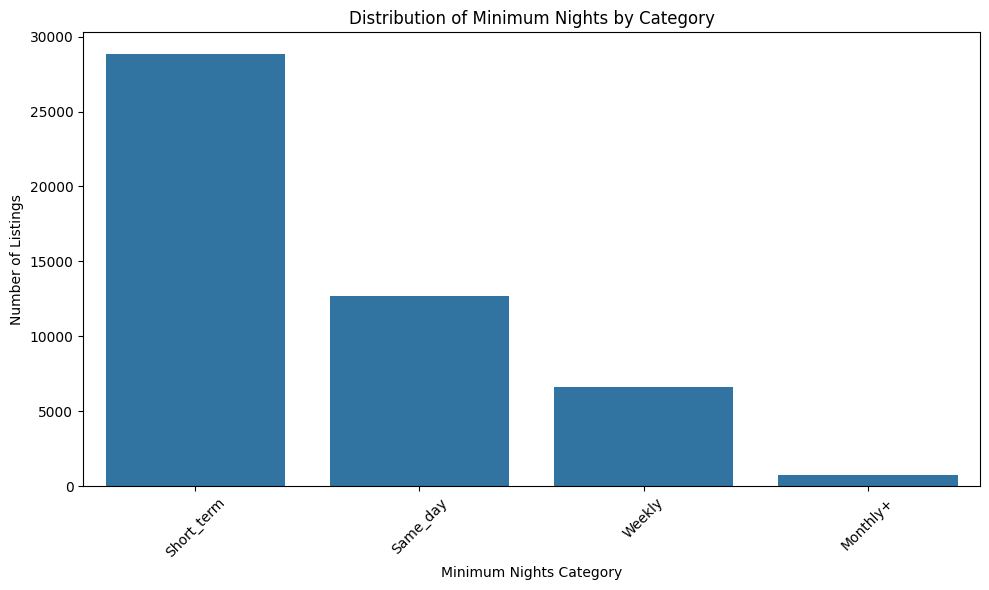

In [22]:
# Plot the distribution of minimum nights by category
print("=== MINIMUM NIGHTS BY CATEGORY ===\n")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='minimum_nights_category', order=df['minimum_nights_category'].value_counts().index)
plt.title('Distribution of Minimum Nights by Category')
plt.xlabel('Minimum Nights Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== CORRELATION BETWEEN NUMERICAL FEATURES ===



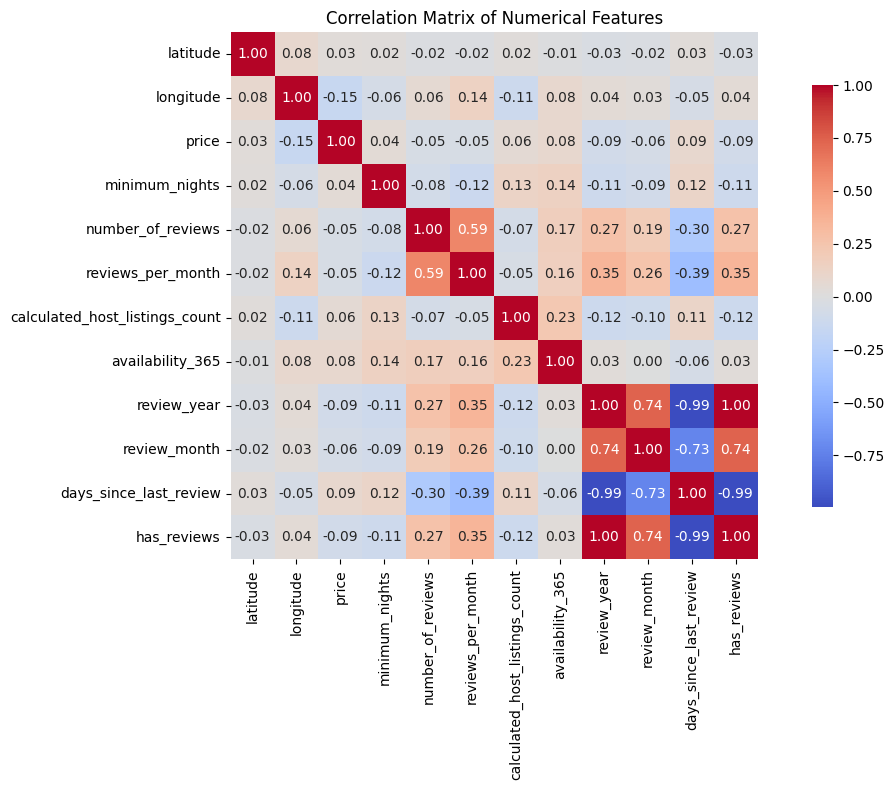

In [23]:
# Check the correlation between numerical features
print("=== CORRELATION BETWEEN NUMERICAL FEATURES ===\n")
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [24]:
# Correlation with price
print("=== CORRELATION WITH PRICE ===\n")
correlation_with_price = df.select_dtypes(include=[np.number]).corr()['price'].sort_values(ascending=False)
print("Correlation of features with price:")
print(correlation_with_price)

=== CORRELATION WITH PRICE ===

Correlation of features with price:
price                             1.000000
days_since_last_review            0.086011
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
number_of_reviews                -0.047954
reviews_per_month                -0.050564
review_month                     -0.061351
has_reviews                      -0.085151
review_year                      -0.085167
longitude                        -0.150019
Name: price, dtype: float64


In [25]:
# Pick the top 5 features correlated with price
top_features = correlation_with_price.index[:5]
print("\nTop 5 features correlated with price:")
print(top_features)


Top 5 features correlated with price:
Index(['price', 'days_since_last_review', 'availability_365',
       'calculated_host_listings_count', 'minimum_nights'],
      dtype='object')


## Modelling

In [26]:
df.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_year,review_month,days_since_last_review,price_category,neighbourhood_grouped,minimum_nights_category,review_status,review_recency,has_reviews
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10,2449,Premium,Kensington,Same_day,Has_Reviews,Old,1
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,5,2235,Luxury,Midtown,Same_day,Has_Reviews,Old,1
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,0,0,9999,Premium,Harlem,Short_term,Never_Reviewed,Never_Reviewed,0
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,7,2190,Mid-range,Clinton Hill,Same_day,Has_Reviews,Old,1
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11,2418,Mid-range,East Harlem,Weekly,Has_Reviews,Old,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_name                       48895 non-null  object  
 1   neighbourhood_group             48895 non-null  object  
 2   neighbourhood                   48895 non-null  object  
 3   latitude                        48895 non-null  float64 
 4   longitude                       48895 non-null  float64 
 5   room_type                       48895 non-null  object  
 6   price                           48895 non-null  int64   
 7   minimum_nights                  48895 non-null  int64   
 8   number_of_reviews               48895 non-null  int64   
 9   reviews_per_month               48895 non-null  float64 
 10  calculated_host_listings_count  48895 non-null  int64   
 11  availability_365                48895 non-null  int64   
 12  review_year       

Mean Squared Error: 22404.26
R-squared: 0.49


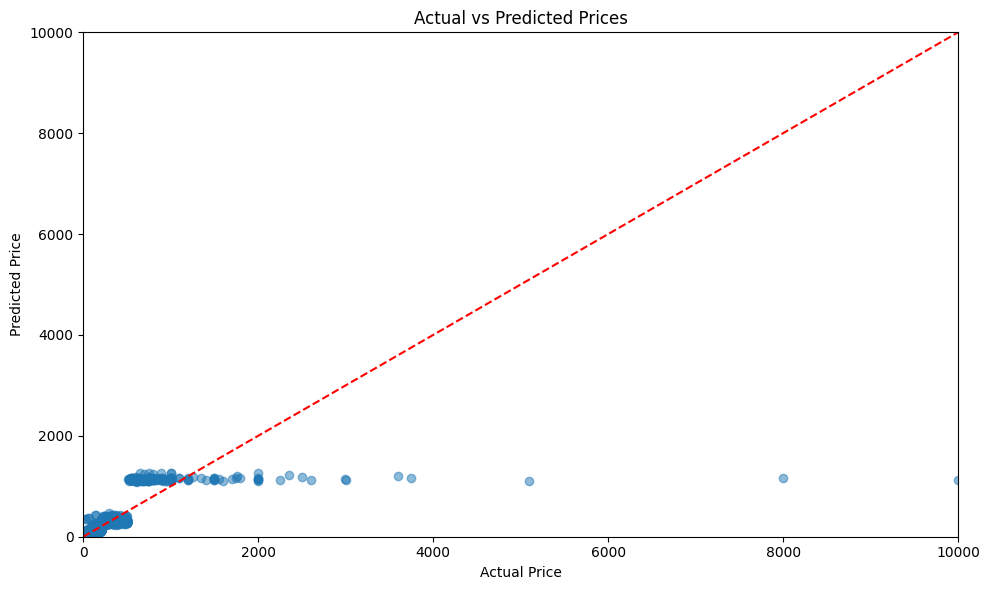

In [28]:
# We will now proceed to build a simple linear regression model to predict the price of listings based on the top features identified.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for modeling
X = df[top_features].drop(columns=['price'])
y = df['price']

# Since the top features are only numerical, we can add categorical features as well
X = X .join(pd.get_dummies(df[['room_type', 'neighbourhood_grouped', 'price_category', 'minimum_nights_category']], drop_first=True))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
# Visualize the predictions vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim(0, df['price'].max())
plt.ylim(0, df['price'].max())
plt.tight_layout()
plt.show()


Random Forest Mean Squared Error: 21492.55
Random Forest R^2 Score: 0.51


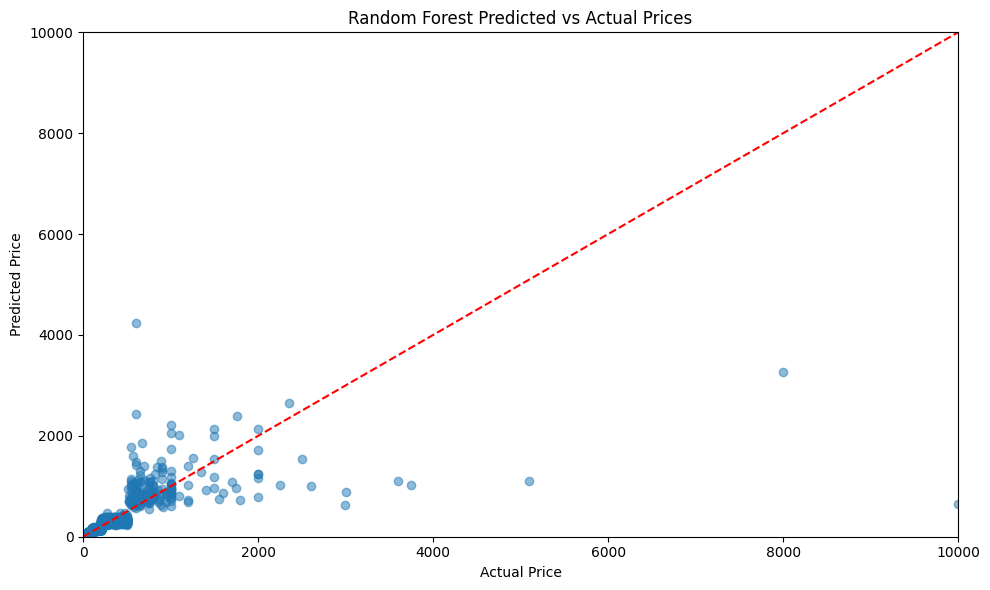

In [ ]:
# Random Forest Regressor for better performance
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model to the training data
rf_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)
# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest R^2 Score: {r2_rf:.2f}")
# Visualize the Random Forest predictions vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Random Forest Predicted vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim(0, y_test.max())
plt.ylim(0, y_test.max())
plt.tight_layout()
plt.show()


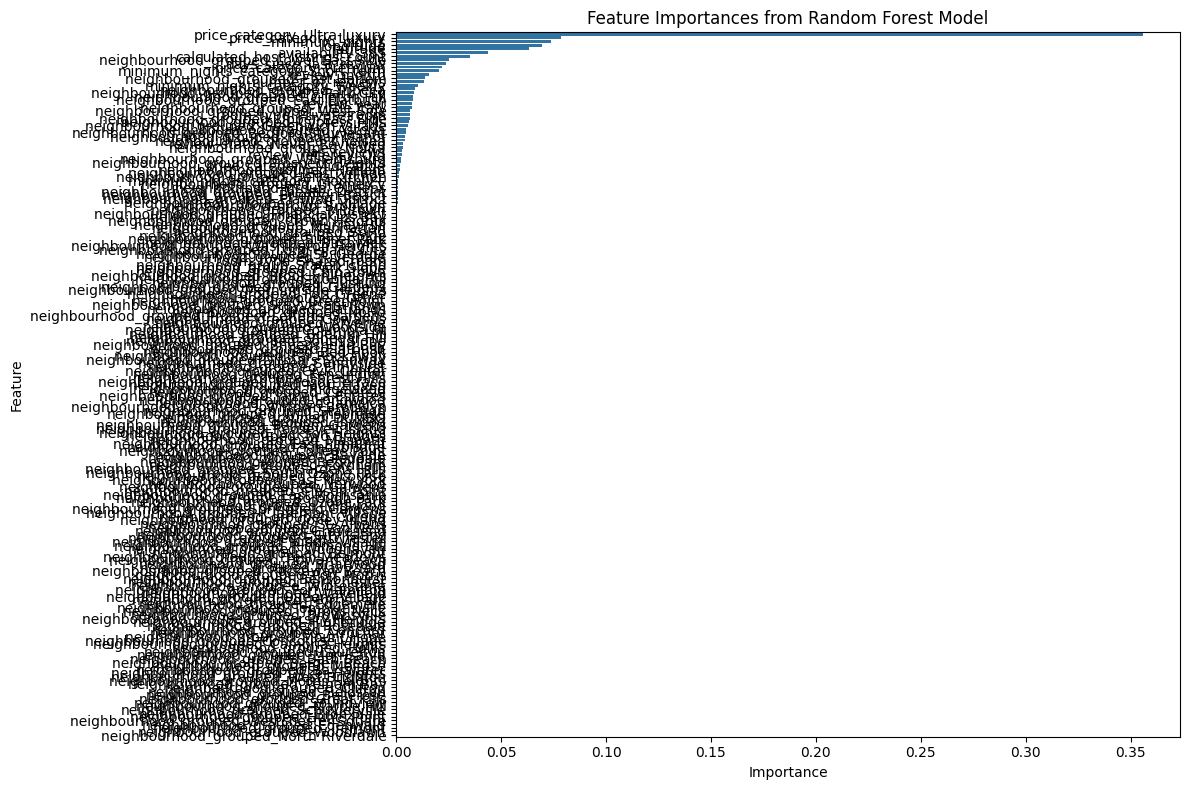

In [ ]:
# Feature importance analysis
importances = rf_model.feature_importances_
feature_names = X.columns
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# A deep dive into the most important features
top_features = feature_importances.head(10)
print("=== TOP 10 MOST IMPORTANT FEATURES ===\n")
print(top_features)

=== TOP 10 MOST IMPORTANT FEATURES ===

                                   Feature  Importance
19             price_category_Ultra-luxury    0.355745
18                   price_category_Luxury    0.078440
2                           minimum_nights    0.073747
1                                longitude    0.069304
0                                 latitude    0.063140
5                         availability_365    0.043957
4           calculated_host_listings_count    0.035424
114  neighbourhood_grouped_Lower East Side    0.025403
8                   days_since_last_review    0.023921
17                  price_category_Premium    0.021871



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


XGBoost Mean Squared Error: 26203.02
XGBoost R^2 Score: 0.41


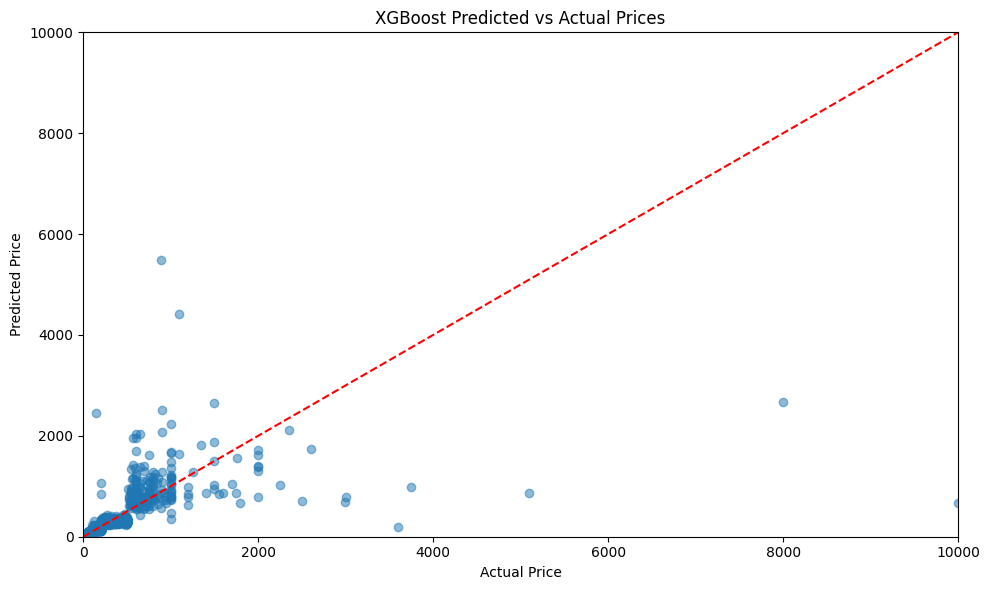

In [ ]:
# Alternative approach: Use XGBoost for better performance
!pip install xgboost --quiet
from xgboost import XGBRegressor
# Create an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
# Fit the model to the training data
xgb_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost R^2 Score: {r2_xgb:.2f}")
# Visualize the XGBoost predictions vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('XGBoost Predicted vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim(0, y_test.max())
plt.ylim(0, y_test.max())
plt.tight_layout()
plt.show()

Epoch [10/100], Loss: 84541.2969
Epoch [20/100], Loss: 84337.5781
Epoch [30/100], Loss: 83987.3750
Epoch [40/100], Loss: 83397.0703
Epoch [50/100], Loss: 82456.1250
Epoch [60/100], Loss: 81043.3438
Epoch [70/100], Loss: 79045.4141
Epoch [80/100], Loss: 76381.2344
Epoch [90/100], Loss: 73047.5781
Epoch [100/100], Loss: 69168.2969
Neural Network Mean Squared Error: 52107.68
Neural Network R^2 Score: -0.18


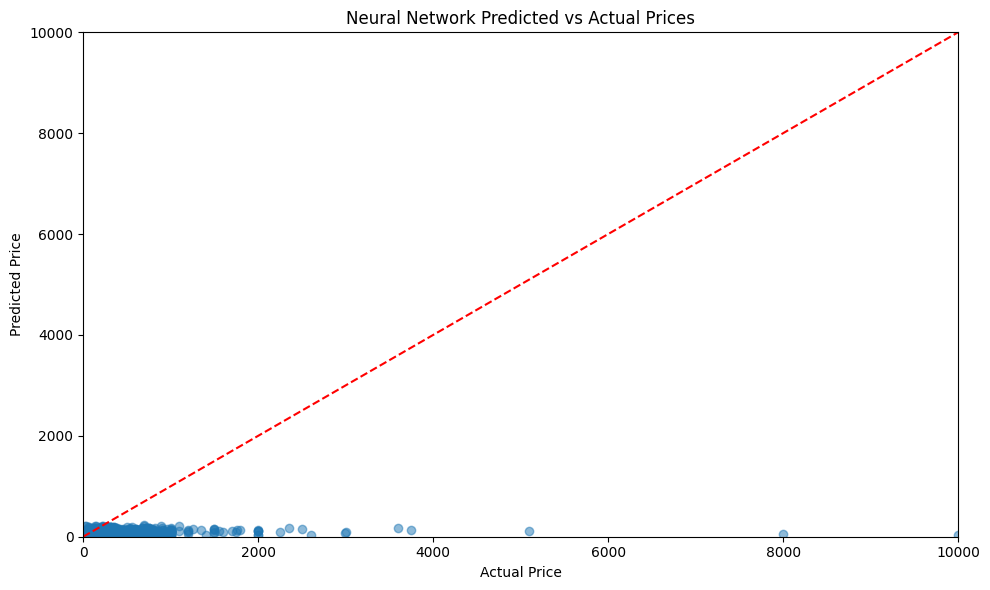

In [ ]:
# Deep learning approach: Use a neural network for regression using Torch
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
# Create the model
input_size = X_train.shape[1]
model_nn = SimpleNN(input_size)
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_nn.parameters(), lr=0.001)
# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model_nn.train()
    optimizer.zero_grad()
    outputs = model_nn(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
# Evaluate the model
model_nn.eval()
with torch.no_grad():
    y_pred_nn = model_nn(X_test_tensor)
    mse_nn = mean_squared_error(y_test_tensor.numpy(), y_pred_nn.numpy())
    r2_nn = r2_score(y_test_tensor.numpy(), y_pred_nn.numpy())
print(f"Neural Network Mean Squared Error: {mse_nn:.2f}")
print(f"Neural Network R^2 Score: {r2_nn:.2f}")
# Visualize the neural network predictions vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn.numpy(), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Neural Network Predicted vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim(0, y_test.max())
plt.ylim(0, y_test.max())
plt.tight_layout()
plt.show()

In [ ]:
%pip install graphviz --quiet
!pip install torchviz --quiet
from torchviz import make_dot
# Create a dummy input for visualization
dummy_input = torch.randn(1, input_size)
# Generate the computational graph
graph = make_dot(model_nn(dummy_input), params=dict(model_nn.named_parameters()))
# Save the graph to a file
graph.render('nn_architecture', format='png', cleanup=True)
# Display the neural network architecture
from IPython.display import Image
Image(filename='nn_architecture.png')


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH